<a href="https://colab.research.google.com/github/prachi-28/Machine_Learning_Practice/blob/main/Fruit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fruits = pd.read_table('/content/fruit_data_with_colors.txt')

In [3]:
fruits.head()


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
# Storing all unique classes
apple_data=fruits[fruits['fruit_name']=='apple']
orange_data=fruits[fruits['fruit_name']=='orange']
lemon_data=fruits[fruits['fruit_name']=='lemon']
mandarin_data=fruits[fruits['fruit_name']=='mandarin']

In [5]:
apple_data.head() #fruit_label is 1 for apple and so on

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


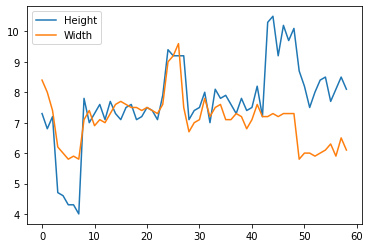

In [7]:
plt.plot(fruits['height'],label='Height')
plt.plot(fruits['width'],label='Width')
plt.legend()


In [21]:
#Creating numpy arrays for X and Y
X = fruits[['mass','width','height']].values
Y = fruits['fruit_name'].values

In [22]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=42, stratify=Y)

**KNN ALGO**

In [23]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [24]:
#Setting neighbor from 1 to 9
neighbors = np.arange(1,9)

In [25]:
#Setting up arrays for train and test accuracy for every neighbor
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [27]:
for i,k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, Y_train)

  #Compute accuracy on the training set
  train_accuracy[i] = knn.score(X_train, Y_train)
    
  #Compute accuracy on the test set
  test_accuracy[i] = knn.score(X_test, Y_test) 

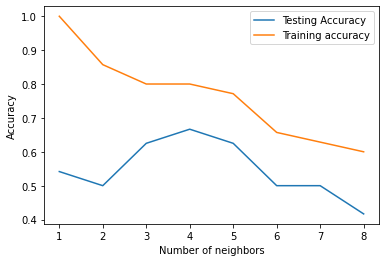

In [28]:
#Generating plot for training and testing accuracy with k value

plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [29]:
#From the testing graph, we see that at k=7, we get the maximum accuracy
#So, we create KNN with k=4

knn = KNeighborsClassifier(n_neighbors=7)
#Fit the model
knn.fit(X_train,Y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [30]:
#Computing the accuracy

knn.score(X_test,Y_test)

0.5

In [31]:
#Computing confusion matrix 

from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
confusion_matrix(Y_test,Y_pred)


array([[5, 0, 0, 3],
       [3, 2, 0, 1],
       [0, 2, 0, 0],
       [3, 0, 0, 5]])